<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-4/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset_path = './breast-cancer.csv'
df = pd.read_csv(
    dataset_path,
    names=[
        'age',
        'menopause',
        'tumor-size',
        'inv-nodes',
        'node-caps',
        'deg-malig',
        'breast',
        'breast-quad',
        'irradiat',
        'label'
    ]
)

In [3]:
df['node-caps'] = df['node-caps'].fillna(df['node-caps'].mode()[0])
df['breast-quad'] = df['breast-quad'].fillna(df['breast-quad'].mode()[0])

In [4]:
y = df['label']
X = df.drop('label', axis=1)

In [5]:
non_rank_features = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
rank_features = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

In [6]:
transformer = ColumnTransformer(
    transformers=[
        ("OneHot", OneHotEncoder(drop='first'), non_rank_features),
        ("Ordinal", OrdinalEncoder(), rank_features)
    ],
    remainder='passthrough'
)

X_transformed = transformer.fit_transform(X)

In [7]:
onehot_features = transformer.named_transformers_['OneHot'].get_feature_names_out(non_rank_features)
all_features = onehot_features.tolist() + rank_features

X_encoded = pd.DataFrame(
    X_transformed,
    columns=all_features
)

In [13]:
X_encoded

,menopause_'lt40',menopause_'premeno',node-caps_'yes',breast_'right',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up',irradiat_'yes',age,tumor-size,inv-nodes,deg-malig
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0
282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,1.0
283,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,1.0
284,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0


In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
normalizer = StandardScaler()
X_normalized = normalizer.fit_transform(X_encoded)

In [10]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X_normalized, y_encoded,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [11]:
classifier = SVC(
    random_state=random_state
)
classifier.fit(X_train, y_train)

SVC(random_state=1)

In [12]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)

print('Evaluation results on validation set:')
print(f'Accuracy: {scores}')

Evaluation results on validation set:
Accuracy: 0.686046511627907


## Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
dataset_path = 'auto-insurance.csv'
df = pd.read_csv(
    dataset_path,
    names=[
        'n_claims',
        'total_payment'
    ]
)

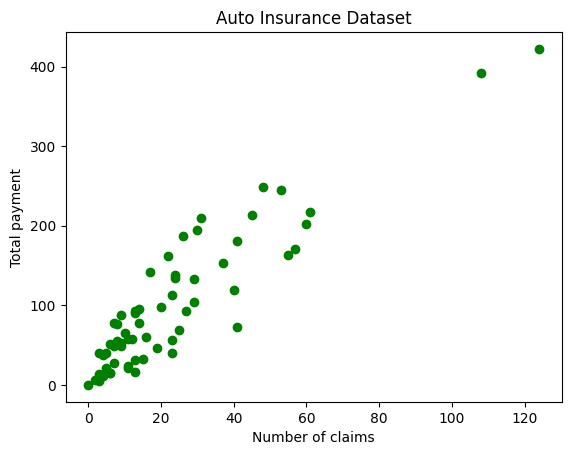

In [18]:
plt.scatter(df['n_claims'], df['total_payment'], color='green')
plt.title('Auto Insurance Dataset')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.show()

In [19]:
normalizer = StandardScaler()
df_normalized = normalizer.fit_transform(df)

In [20]:
X, y = df_normalized[:, 0], df_normalized[:, 1]
X = X.reshape(-1, 1)

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [21]:
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

In [22]:
y_pred = regressor.predict(X_val)
mae = mean_absolute_error(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.4549655045116023
Mean Squared Error: 0.5406791138567528
